<a href="https://colab.research.google.com/github/Joshna9380/OIBSIP/blob/main/Cleaning_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")

print("Initial Shape:", df.shape)
print("Columns:", df.columns)

Initial Shape: (48895, 16)
Columns: Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [3]:
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())


Missing Values Before Cleaning:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [4]:
df["host_name"] = df["host_name"].fillna("Unknown")

In [5]:
df["last_review"] = df["last_review"].fillna("No Review")

In [6]:
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

In [7]:
print("\nDuplicates Before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates After:", df.duplicated().sum())


Duplicates Before: 0
Duplicates After: 0


In [8]:
df = df[(df["price"] > 0) & (df["price"] <= 1000)]


In [9]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

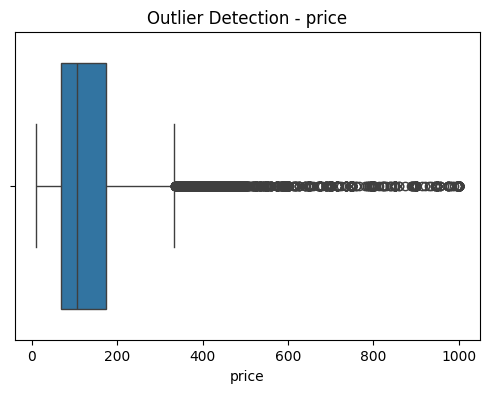

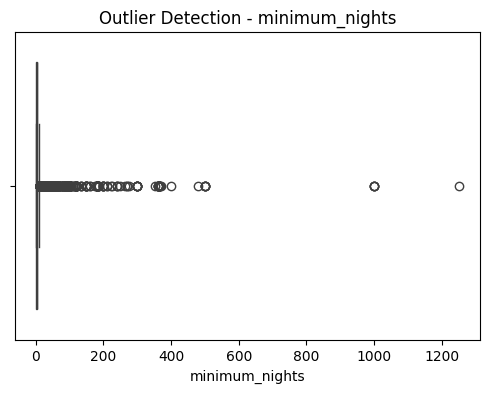

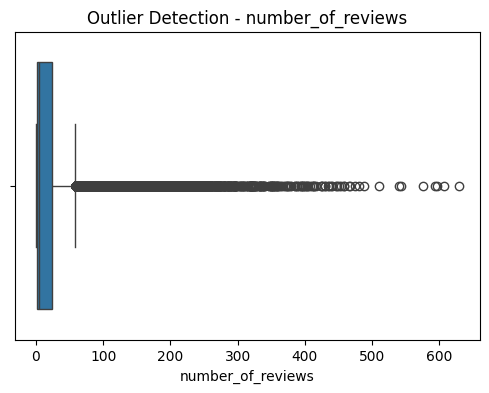

In [10]:
numeric_cols = ["price", "minimum_nights", "number_of_reviews"]
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Detection - {col}")
    plt.show()

In [11]:
df.loc[df["minimum_nights"] > 365, "minimum_nights"] = 365

In [12]:
df.to_csv("cleaned_airbnb_data.csv", index=False)
print("\nFinal Shape After Cleaning:", df.shape)
print("Cleaned dataset saved as cleaned_airbnb_data.csv")


Final Shape After Cleaning: (48645, 16)
Cleaned dataset saved as cleaned_airbnb_data.csv
